<div class='alert alert-block alert-info' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b>  <center> Indian Real Estate Data </center>
</div>

<div class='alert alert-block alert-info' style="font-size: 14pt; font-family: verdana; color: #08415C"> 
   <center>
            <i style="color: #FB8E7E">This notebook displays the citywise information of the real estate data available for Sale for various Indian cities like <b> Chennai, Mumbai, Bangalore, Delhi, Pune, Kolkata and Hyderabad.</b></i></center> 
</div>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno as msno
import warnings 
import folium
import json
import geopandas as gpd
import plotly.express as px

from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
# Importing csv files
df = pd.read_csv(r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Housing Real Estate Data from Indian Cities\02 Data\Clean Data.csv')

In [3]:
# Checking number of rows and columns in the dataset
df.shape

(14517, 12)

In [4]:
#checking Datatypes of the columns present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            14517 non-null  object
 1   Property_Type   14517 non-null  object
 2   Bedrooms1       14517 non-null  object
 3   Baths           14517 non-null  int64 
 4   Balcony         14517 non-null  object
 5   City            14517 non-null  object
 6   Location        14517 non-null  object
 7   Total_Area      14517 non-null  int64 
 8   Price_per_SQFT  14517 non-null  int64 
 9   Price           14517 non-null  int64 
 10  Property Title  14517 non-null  object
 11  Description1    14500 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#checking data
df.head()

,Name,Property_Type,Bedrooms1,Baths,Balcony,City,Location,Total_Area,Price_per_SQFT,Price,Property Title,Description1
0,Casagrand ECR 14,Flat,4 BHK,4,Yes,Chennai,"Kanathur Reddikuppam, Chennai",2583,7700,19900000,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...
1,DAC Prapthi,Flat,3 BHK,3,No,Chennai,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580,10000000,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3..."
2,DRA 90 Degrees,Flat,3 BHK,3,No,Chennai,"Rose Avenue, Pallikaranai,Chennai",1444,9000,13000000,"3 BHK Flat for sale in Pallikaranai, Chennai",Looking for a 3 BHK Apartment for sale in Chen...
3,Ramcons Dominion,Flat,3 BHK,3,Yes,Chennai,"Tirumurthy Nagar, Nungambakkam,Chennai",1658,15680,26000000,"3 BHK Flat for sale in Nungambakkam, Chennai",Best 3 BHK Apartment for modern-day lifestyle ...
4,VGN Coasta,Flat,4 BHK,5,Yes,Chennai,"Muttukadu, Chennai",4200,7070,29700000,"4 BHK Flat for sale in Muttukadu, Chennai",Best 4 BHK Apartment for modern-day lifestyle ...


<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive"> 
    <b> <center> 2. Data Wrangling </center> </b>
</div>

##### Dropping a column

In [6]:
df = df.drop(columns = ['Description1'])

##### Renaming a column

In [7]:
df = df.rename(columns = {'Bedrooms1': 'Bedrooms'})
df

,Name,Property_Type,Bedrooms,Baths,Balcony,City,Location,Total_Area,Price_per_SQFT,Price,Property Title
0,Casagrand ECR 14,Flat,4 BHK,4,Yes,Chennai,"Kanathur Reddikuppam, Chennai",2583,7700,19900000,"4 BHK Flat for sale in Kanathur Reddikuppam, C..."
1,DAC Prapthi,Flat,3 BHK,3,No,Chennai,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580,10000000,"3 BHK Flat for sale in West Tambaram, Chennai"
2,DRA 90 Degrees,Flat,3 BHK,3,No,Chennai,"Rose Avenue, Pallikaranai,Chennai",1444,9000,13000000,"3 BHK Flat for sale in Pallikaranai, Chennai"
3,Ramcons Dominion,Flat,3 BHK,3,Yes,Chennai,"Tirumurthy Nagar, Nungambakkam,Chennai",1658,15680,26000000,"3 BHK Flat for sale in Nungambakkam, Chennai"
4,VGN Coasta,Flat,4 BHK,5,Yes,Chennai,"Muttukadu, Chennai",4200,7070,29700000,"4 BHK Flat for sale in Muttukadu, Chennai"
...,...,...,...,...,...,...,...,...,...,...,...
14512,Property in Tilak Nagar,Flat,2 BHK,3,Yes,New Delhi,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800,4000000,"2 BHK Flat for sale in Tilak Nagar, New Delhi"
14513,Property in Jaffarpur Kalan,Independent House,1 RK,2,Yes,New Delhi,"Rawta, Jaffarpur Kalan,New Delhi",472,2970,1400000,1 BHK Independent House for sale in Jaffarpur ...
14514,Property in Geeta Colony,Flat,1 RK,1,Yes,New Delhi,"Rani Garden, Geeta Colony,New Delhi",378,7940,3000000,"1 BHK Flat for sale in Geeta Colony, New Delhi"
14515,Property in Sector 16 Rohini,Flat,3 BHK,2,Yes,New Delhi,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570,6000000,"3 BHK Flat for sale in Sector 16 Rohini, New D..."


In [8]:
df.shape

(14517, 11)

In [9]:
#Checking for missing values
df.isnull().sum()

Name              0
Property_Type     0
Bedrooms          0
Baths             0
Balcony           0
City              0
Location          0
Total_Area        0
Price_per_SQFT    0
Price             0
Property Title    0
dtype: int64

No missing value found in the data

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive"> 
    <b> <center> 3. Visualization & Analysis </center> </b>
</div>

#### Queries to be answered during this analysis
- Data Presence
- Maximum Property type in the listing
- Maximum Bedrooms for sale
- Bedroom vs price per sq ft
- price range in cities
- Major Locations
- Impact of Bathrooms & Balcony presence on property price
- Area Range Vs Price per sq ft
- Wordcloud?


#### A. Cities with Property listings

In [10]:
df_citylist = df['City'].value_counts()
df_citylist

Bangalore    4509
Pune         2963
New Delhi    2164
Chennai      1594
Kolkata      1391
Mumbai       1350
Hyderabad     540
Thane           6
Name: City, dtype: int64

In [11]:
#Importing json file

df_city = r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Housing Real Estate Data from Indian Cities\gadm41_IND_3.json'

In [12]:
f = open(r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Housing Real Estate Data from Indian Cities\gadm41_IND_3.json')

data  = json.load(f)

for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'GID_3': 'IND.1.1.1_1', 'GID_0': 'IND', 'COUNTRY': 'India', 'GID_1': 'IND.1_1', 'NAME_1': 'AndamanandNicobar', 'NL_NAME_1': 'NA', 'GID_2': 'IND.1.1_1', 'NAME_2': 'NicobarIslands', 'NL_NAME_2': 'NA', 'NAME_3': 'n.a.(2304)', 'VARNAME_3': 'NA', 'NL_NAME_3': 'NA', 'TYPE_3': 'Taluk', 'ENGTYPE_3': 'Taluk', 'CC_3': 'NA', 'HASC_3': 'NA'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[93.7899, 6.852], [93.7909, 6.851], [93.7878, 6.8481], [93.7844, 6.8489], [93.7874, 6.8526], [93.7899, 6.852]]], [[[93.8475, 7.2358], [93.8481, 7.2331], [93.8425, 7.2275], [93.8442, 7.2211], [93.8481, 7.2161], [93.8542, 7.2136], [93.8578, 7.2147], [93.8592, 7.2172], [93.8684, 7.2174], [93.8744, 7.2105], [93.8769, 7.2039], [93.8828, 7.2036], [93.88, 7.1934], [93.8836, 7.1885], [93.8836, 7.1838], [93.88, 7.1728], [93.8817, 7.1686], [93.8852, 7.1661], [93.8839, 7.1626], [93.8879, 7.1511], [93.8843, 7.1298], [93.8857, 7.1258], [93.8899, 7.1239], [93.8914, 7.1211], [93.8886, 

{'type': 'Feature', 'properties': {'GID_3': 'IND.11.12.1_1', 'GID_0': 'IND', 'COUNTRY': 'India', 'GID_1': 'IND.11_1', 'NAME_1': 'Gujarat', 'NL_NAME_1': 'NA', 'GID_2': 'IND.11.12_1', 'NAME_2': 'Gandhinagar', 'NL_NAME_2': 'NA', 'NAME_3': 'Dahegam', 'VARNAME_3': 'NA', 'NL_NAME_3': 'NA', 'TYPE_3': 'Taluk', 'ENGTYPE_3': 'Taluk', 'CC_3': 'NA', 'HASC_3': 'NA'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[72.8479, 22.9928], [72.8315, 23.0086], [72.8299, 23.0121], [72.8351, 23.0162], [72.8306, 23.0191], [72.8195, 23.0219], [72.8179, 23.0264], [72.8216, 23.0341], [72.8175, 23.0369], [72.8099, 23.0388], [72.805, 23.0424], [72.8042, 23.0531], [72.7998, 23.0562], [72.7743, 23.0586], [72.7732, 23.062], [72.7862, 23.0754], [72.7867, 23.0807], [72.7837, 23.0852], [72.7717, 23.0928], [72.7566, 23.0908], [72.7517, 23.0924], [72.7502, 23.0953], [72.7536, 23.0984], [72.7492, 23.1059], [72.7493, 23.1097], [72.7633, 23.1112], [72.7717, 23.1141], [72.7825, 23.1246], [72.7938, 23.1303], [72.7975, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20.59, 78.96], zoom_start = 8)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = df_city, 
    data = df_citylist,
    columns = ['City'],
    key_on = 'name.properties.feature', 
    fill_color = 'YlGnBu', fill_opacity=0.6, line_opacity=0.2,
    legend_name = 'city',
      Highlight = True, overlay = True).add_to(map)
folium.LayerControl().add_to(map)

# Hover Functionality
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0, 
                            'weight': 0}


# Hover over shading
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.3, 
                                'weight': 0.1}


#Town names
town_name = folium.features.GeoJson(
    df_city,
    control=False,
    style_function = style_function,
    highlight_function = highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['city'],
        aliases=['City: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map.add_child(town_name)
map.keep_in_front(town_name)

"""# Add light mode. 
folium.TileLayer('cartodbpositron',name="light mode",control=True).add_to(map)

#Map title
map_title = 'Population per Connecticut town 2011-2021'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(map_title) 
map.get_root().html.add_child(folium.Element(title_html))"""

map

AttributeError: 'NoneType' object has no attribute 'get'

Couldn't work with the choropleth maps

#### B. Listings available

In [14]:
df_property = df['Property_Type'].value_counts()
df_property

Flat                 9697
Independent House    4139
Villa                 681
Name: Property_Type, dtype: int64

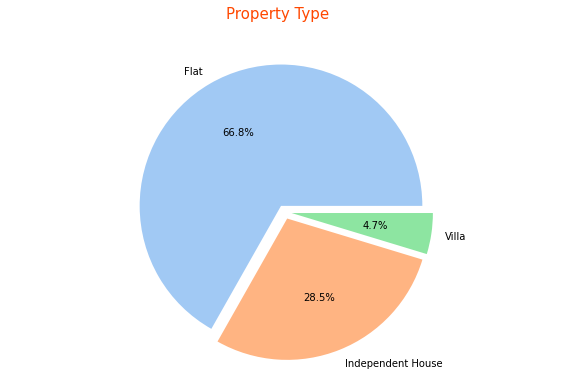

In [15]:
# pie chart - properties available 

df_pie = df['Property_Type'].value_counts
fig, (ax) = plt.subplots(1, figsize = (10,6))

#choosing color palette
palette_color = sns.color_palette('pastel')

#creating pie chart
ax.pie(df['Property_Type'].value_counts().values, labels = df['Property_Type'].value_counts().index, colors = palette_color, 
      autopct = '%0.1f%%', explode = [0.05, 0.05, 0.05])
ax.axis('equal')

fig.suptitle('Property Type', fontsize=15, color = '#ff4800');

Maximum Flats are listed in the website followed by Independent Houses and Villas

#### C. Cities with Property type

In [16]:
"""Checking properties presence in different cities and property type """
Properties = pd.DataFrame(df.groupby(['City']).apply(lambda df: df['Property_Type'].value_counts()))
Properties

Property_Type
City                                      
Bangalore Flat                        2401
          Independent House           1755
          Villa                        353
Chennai   Flat                         952
          Independent House            492
          Villa                        150
Hyderabad Flat                         426
          Independent House             79
          Villa                         35
Kolkata   Flat                        1122
          Independent House            247
          Villa                         22
Mumbai    Flat                        1184
          Independent House            148
          Villa                         18
New Delhi Flat                        1174
          Independent House            954
          Villa                         36
Pune      Flat                        2432
          Independent House            464
          Villa                         67
Thane     Flat                           6

All the listings have a majority of flats for sale. We will figure out the number of bedrooms in these listings as we move forward with the study

###### Stacked Bar Plot

In [17]:
#using crosstab
property_stack = pd.crosstab(df['City'], df['Property_Type'],dropna = False)
property_stack

Property_Type,Flat,Independent House,Villa
City,,,
Bangalore,2401,1755,353
Chennai,952,492,150
Hyderabad,426,79,35
Kolkata,1122,247,22
Mumbai,1184,148,18
New Delhi,1174,954,36
Pune,2432,464,67
Thane,6,0,0


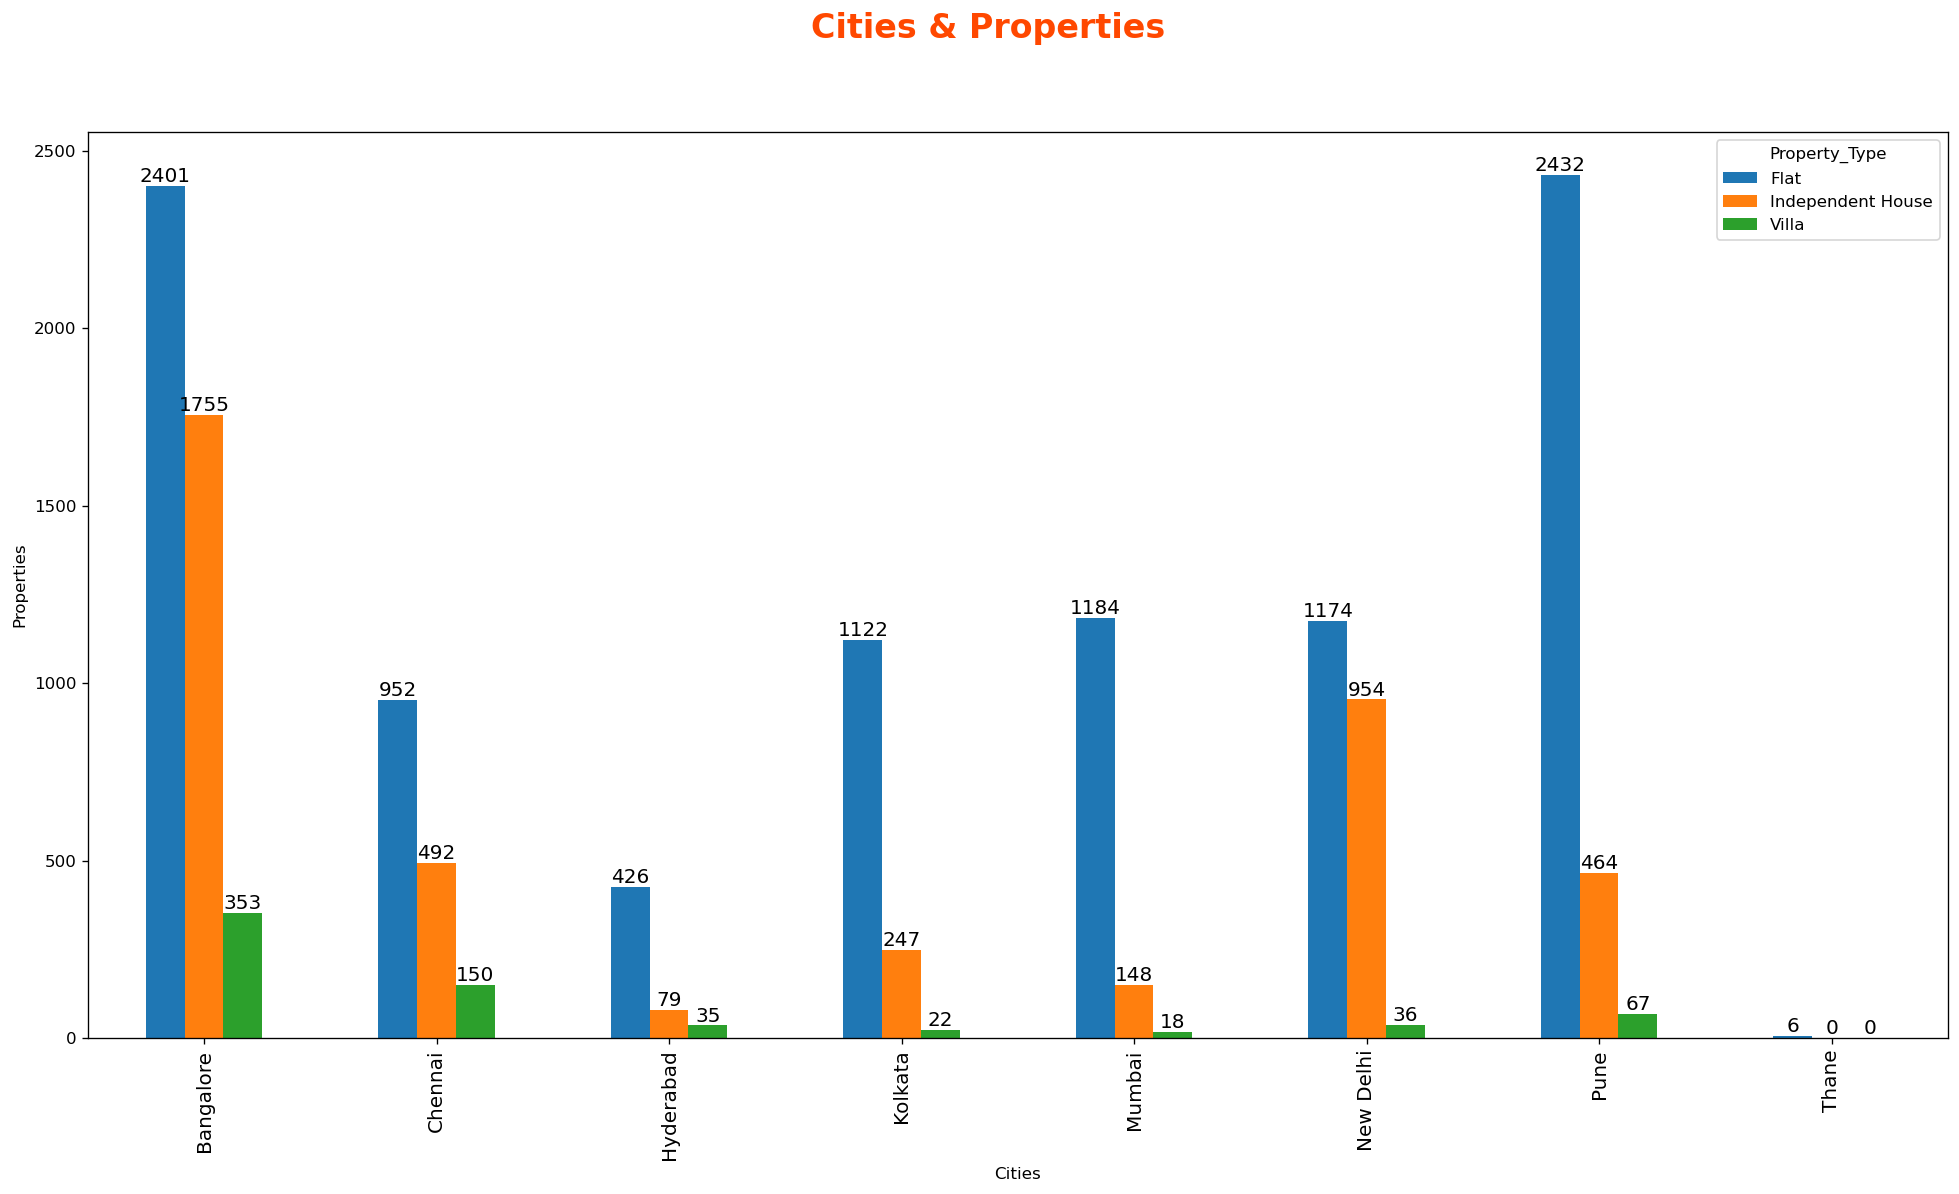

In [18]:
# Get the figure and the axes (or subplots)
fig, ax = plt.subplots(figsize=(20, 10), dpi = 120)


# Using dataframe's plot
property_stack.plot(kind='bar', ax=ax, fontsize=10, grid=False)

ax.set(xlabel='Cities' , ylabel = 'Properties')

ax.bar_label(ax.containers[0], fontsize = 12)
ax.bar_label(ax.containers[1], fontsize = 12)
ax.bar_label(ax.containers[2], fontsize = 12)

fig.suptitle('Cities & Properties', fontsize= 20, fontweight='bold', color = '#ff4800')

#changing font size of ticks on the x-axis
for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(12)

Bangalore leads in terms of listings of properties, followed by Pune and New Dlehi. Pune has more flats listed for sale as compared to other regions while Villas remain to be the least listed among the three properties.

#### D. Maximum bedroom type for sale

In [19]:
df['Bedrooms'].value_counts()

2 BHK     5721
1 RK      3301
3 BHK     3176
4 BHK     1000
5 BHK      462
6 BHK      296
10 BHK     200
7 BHK      145
8 BHK      134
9 BHK       82
Name: Bedrooms, dtype: int64

As expected 1,2 & 3 BHK are the most sought after properties in all of these listings. What's astonishing is the presence of 6,7,8,9 and 10BHK properties. I wonder who have them and list them for :D

In [20]:
bedroom_stack = pd.crosstab(df['City'], df['Bedrooms'],dropna = False)
bedroom_stack

Bedrooms,1 RK,10 BHK,2 BHK,3 BHK,4 BHK,5 BHK,6 BHK,7 BHK,8 BHK,9 BHK
City,,,,,,,,,,
Bangalore,400,114,1854,1187,414,214,136,86,56,48
Chennai,263,11,776,362,89,39,26,13,8,7
Hyderabad,6,5,248,214,44,9,7,2,4,1
Kolkata,131,15,656,409,75,43,29,11,17,5
Mumbai,754,1,409,138,33,11,2,1,1,0
New Delhi,411,46,699,532,221,102,70,27,39,17
Pune,1332,8,1077,334,124,44,26,5,9,4
Thane,4,0,2,0,0,0,0,0,0,0


Banglore has availability of larger sized properties whereas Pune prefers smaller apartments (1RK types)

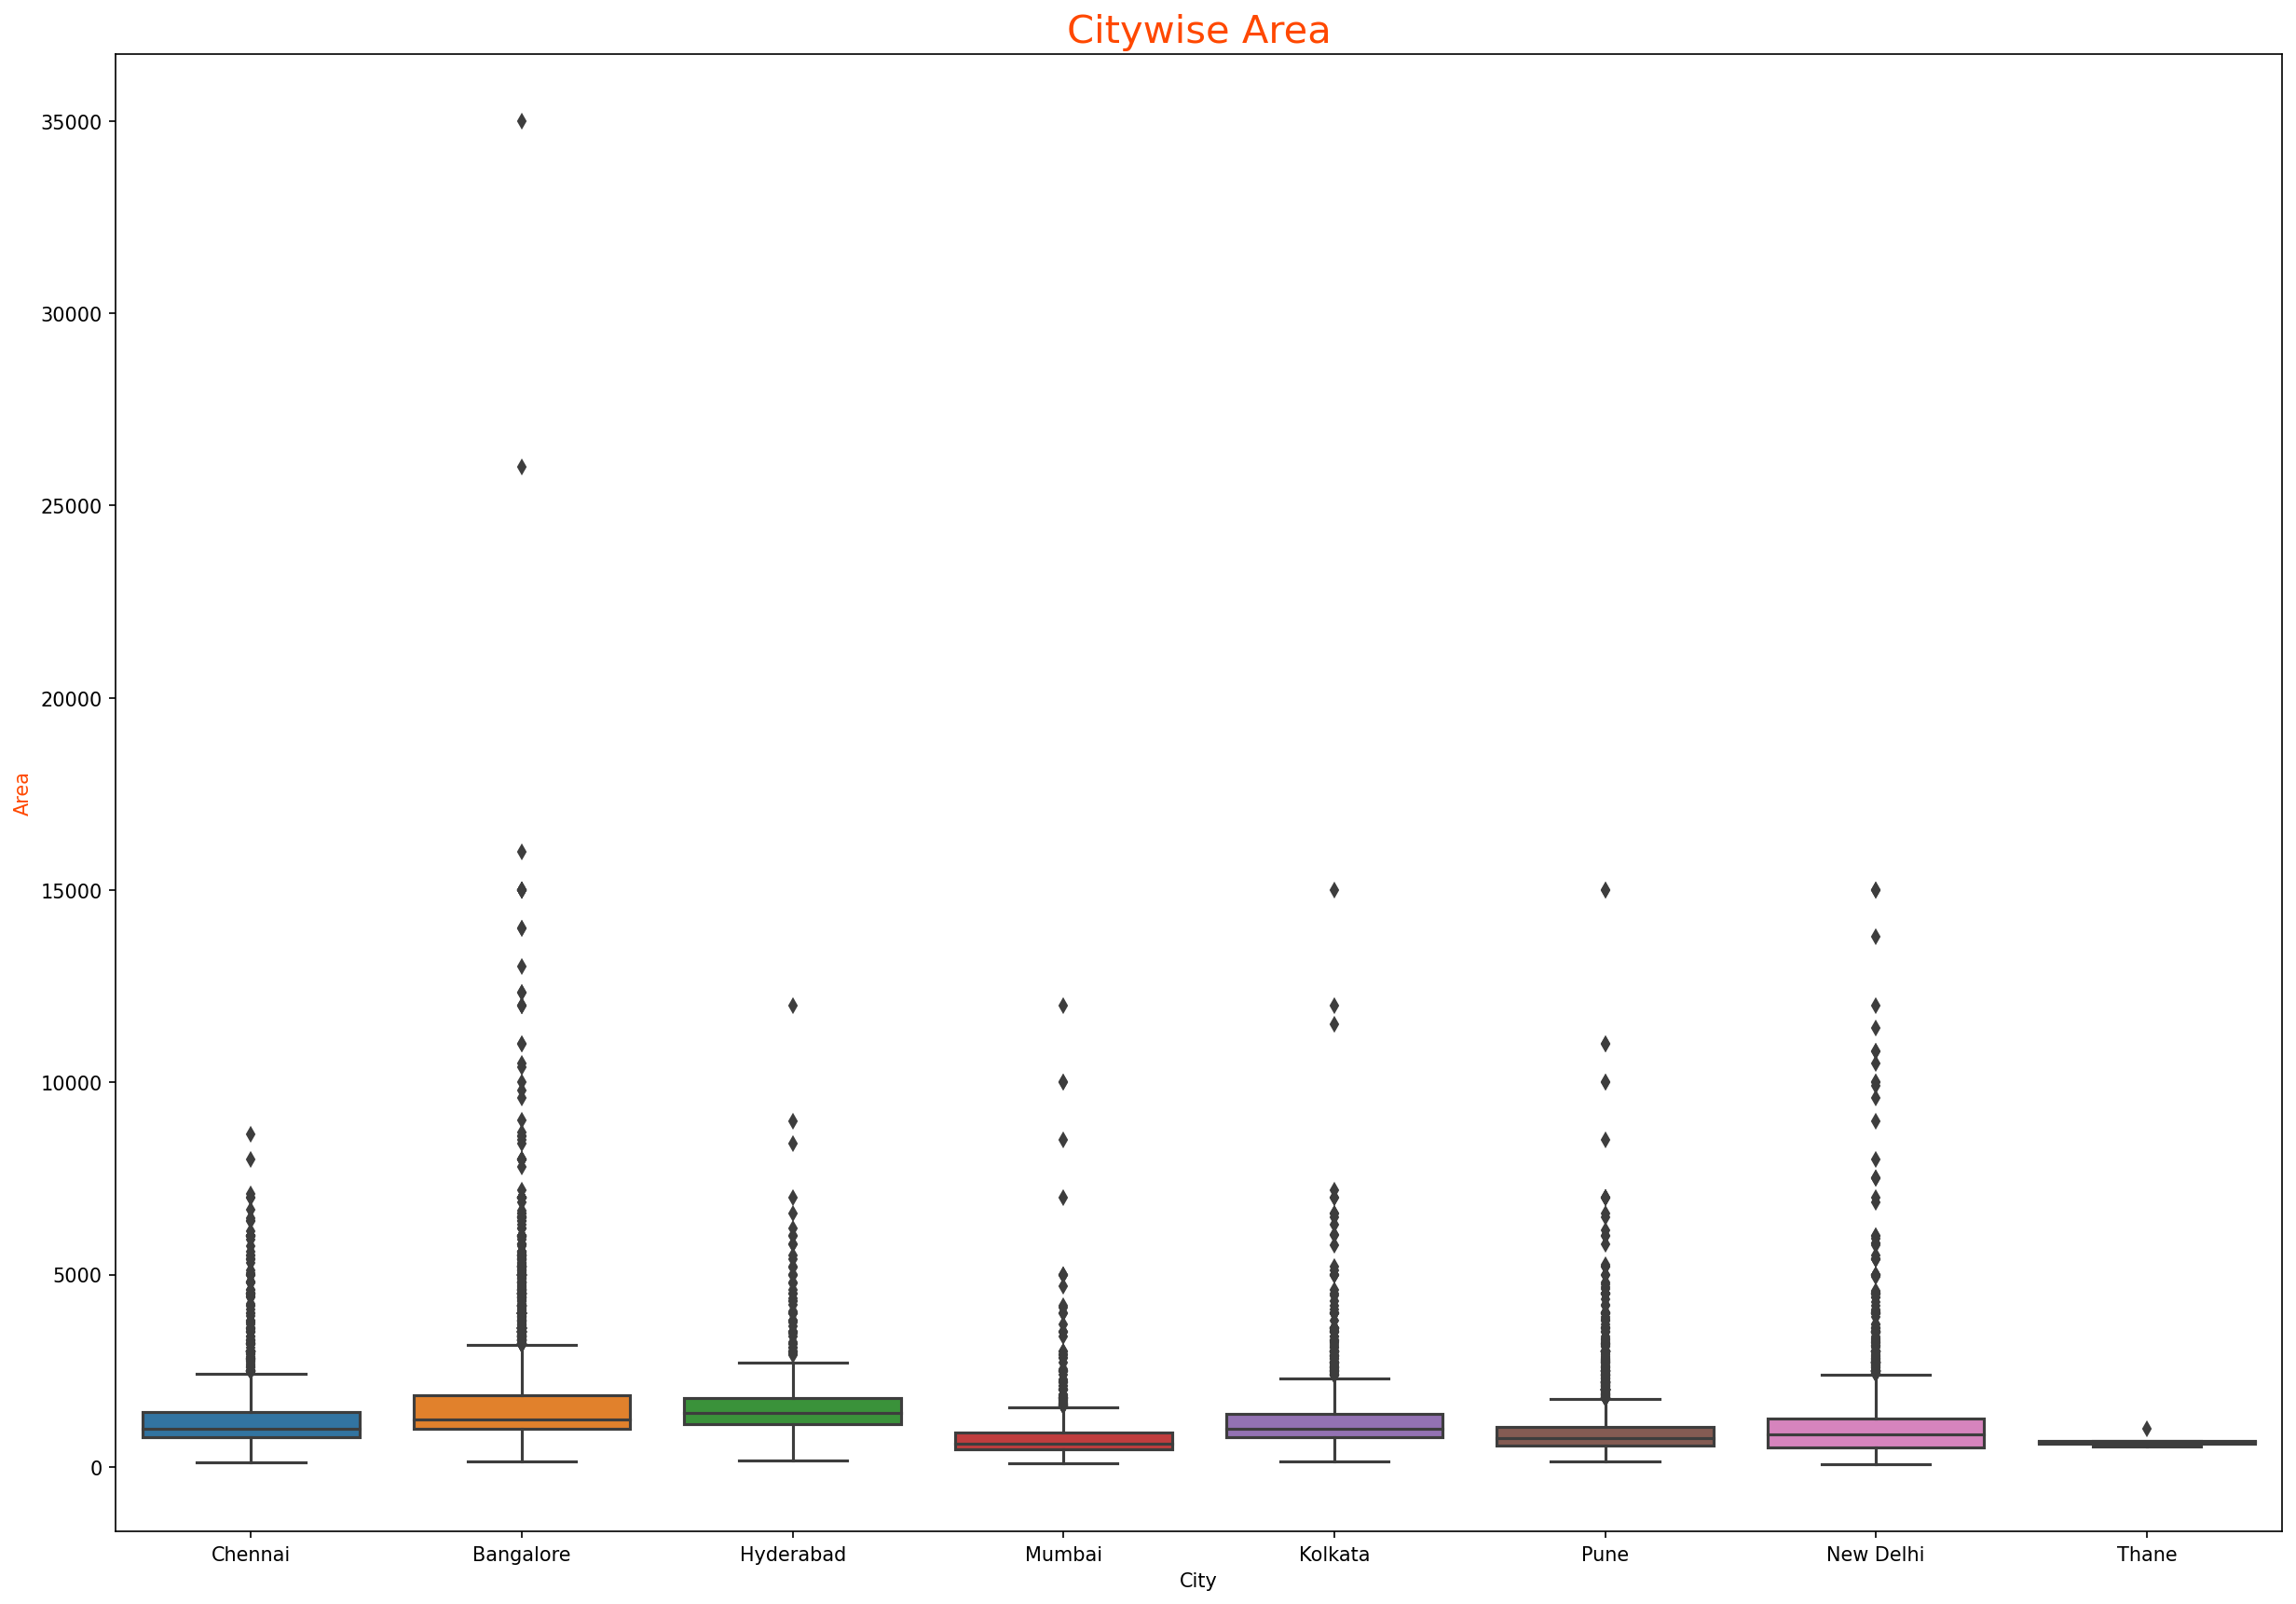

In [21]:
#Creating box plot for checking the citywise area and outliers

plt.figure(figsize = (20,14), dpi = 150)
sns.boxplot(data=df, y='Total_Area', x='City');
plt.ylabel('Area', color = '#ff4800')
plt.title('Citywise Area', fontsize = 20, color = '#ff4800');


#### D. Area Range

In [22]:
df.describe()

,Baths,Total_Area,Price_per_SQFT,Price
count,14517.00000,14517.000000,14517.000000,1.451700e+04
mean,2.75167,1297.690019,11659.687263,1.071414e+07
std,0.89800,1243.919931,48511.962603,1.920300e+07
min,1.00000,70.000000,0.000000,1.000000e+05
25%,2.00000,650.000000,4480.000000,3.700000e+06
50%,3.00000,1000.000000,6050.000000,6.500000e+06
75%,3.00000,1439.000000,9310.000000,1.140000e+07
max,6.00000,35000.000000,999000.000000,8.400000e+08


Text(0.5, 1.0, 'Distribution of Total Area')

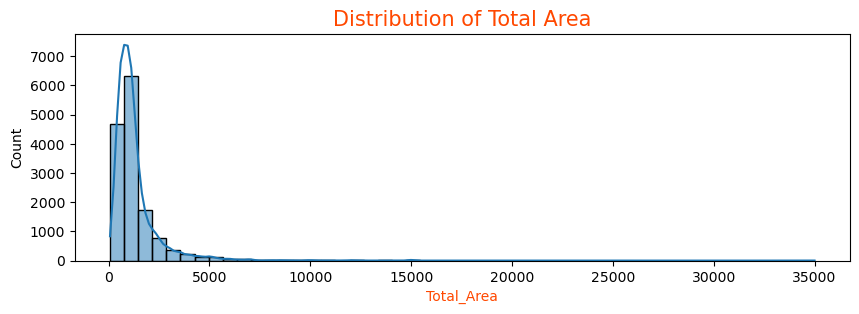

In [23]:
#Categorical Plot
plt.figure(figsize=(10,3), dpi = 100)
sns.histplot(data= df, x= 'Total_Area', bins = 50, kde = True);

plt.xlabel('Total_Area', color = '#ff4800')

plt.title('Distribution of Total Area', fontsize = 15, color = '#ff4800')

In [24]:
"""Classifying Properties based on different sizes - small, medium, large property
0-800 - small property
801-2000 - mid-sized property
2001-3500 - mid-large sized property
3500+ - Large sized property"""

df.loc[(df['Total_Area'] > 0) & (df['Total_Area'] <= 800), 'Area_type'] = 'Small Property'

In [25]:
df.loc[(df['Total_Area'] > 800) & (df['Total_Area'] <= 2000), 'Area_type'] = 'Mid sized Property'

In [26]:
df.loc[(df['Total_Area'] > 2000) & (df['Total_Area'] <= 3500), 'Area_type'] = 'Mid-Large sized Property'

In [27]:
df.loc[(df['Total_Area'] > 3500), 'Area_type'] = 'Large Property'

In [28]:
df['Area_type'].value_counts(dropna = False)

Mid sized Property          7492
Small Property              5094
Mid-Large sized Property    1295
Large Property               636
Name: Area_type, dtype: int64

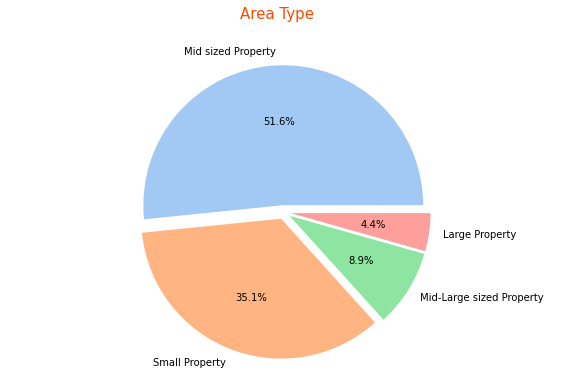

In [29]:
# pie chart - properties available 

df_pie = df['Area_type'].value_counts
fig, (ax) = plt.subplots(1, figsize = (10,6))

#choosing color palette
palette_color = sns.color_palette('pastel')

#creating pie chart
ax.pie(df['Area_type'].value_counts().values, labels = df['Area_type'].value_counts().index, colors = palette_color, 
      autopct = '%0.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
ax.axis('equal')

fig.suptitle('Area Type', fontsize=15, color = '#ff4800');

#### E. Price Range

Text(0.5, 1.0, 'Price Distribution')

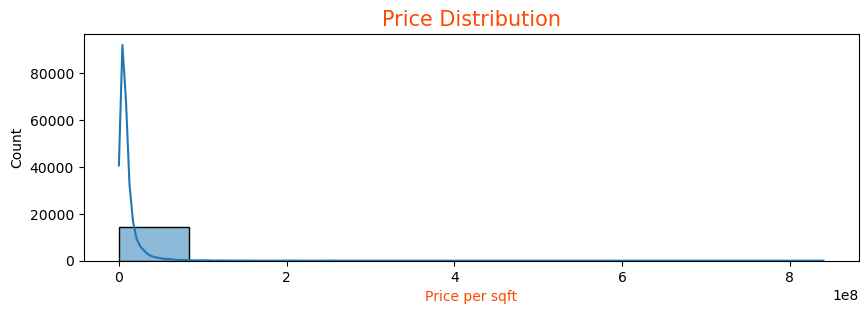

In [30]:
#Categorical Plot for checking price range withtin the data
plt.figure(figsize=(10,3), dpi = 100)
sns.histplot(data= df, x= 'Price', bins = 10, kde = True);

plt.xlabel('Price per sqft', color = '#ff4800')

plt.title('Price Distribution', fontsize = 15, color = '#ff4800')

In [31]:
"""Classifying Price Distribution based on their range - less, medium, high
0-6000000 - affordable property (Although property under 6000000 doesn't come under affordable segment, 
but for the moment we will consider it)
6000001-30000000 - mid-segment property
30000001 - 150000000 - Luxury property
150000000+ - Ultra Luxury property"""

df.loc[(df['Price']> 0) & (df[('Price')] <= 6000000), 'Segment_type'] = 'Affordable Segment'

In [32]:
df.loc[(df['Price'] > 6000000) & (df['Price'] <= 30000000), 'Segment_type'] = 'Mid Segment'

In [33]:
df.loc[(df['Price'] > 30000000) & (df['Price'] <= 150000000), 'Segment_type'] = 'Luxury Segment'

In [34]:
df.loc[(df['Price'] > 150000000), 'Segment_type'] = 'UltraLuxury Segment'

In [35]:
df['Segment_type'].value_counts()

Affordable Segment     6992
Mid Segment            6770
Luxury Segment          722
UltraLuxury Segment      33
Name: Segment_type, dtype: int64

In [36]:
#using crosstab
segment_stack = pd.crosstab(df['Segment_type'], df['Property_Type'],dropna = False)
segment_stack

Property_Type,Flat,Independent House,Villa
Segment_type,,,
Affordable Segment,5430,1364,198
Luxury Segment,247,377,98
Mid Segment,4017,2377,376
UltraLuxury Segment,3,21,9


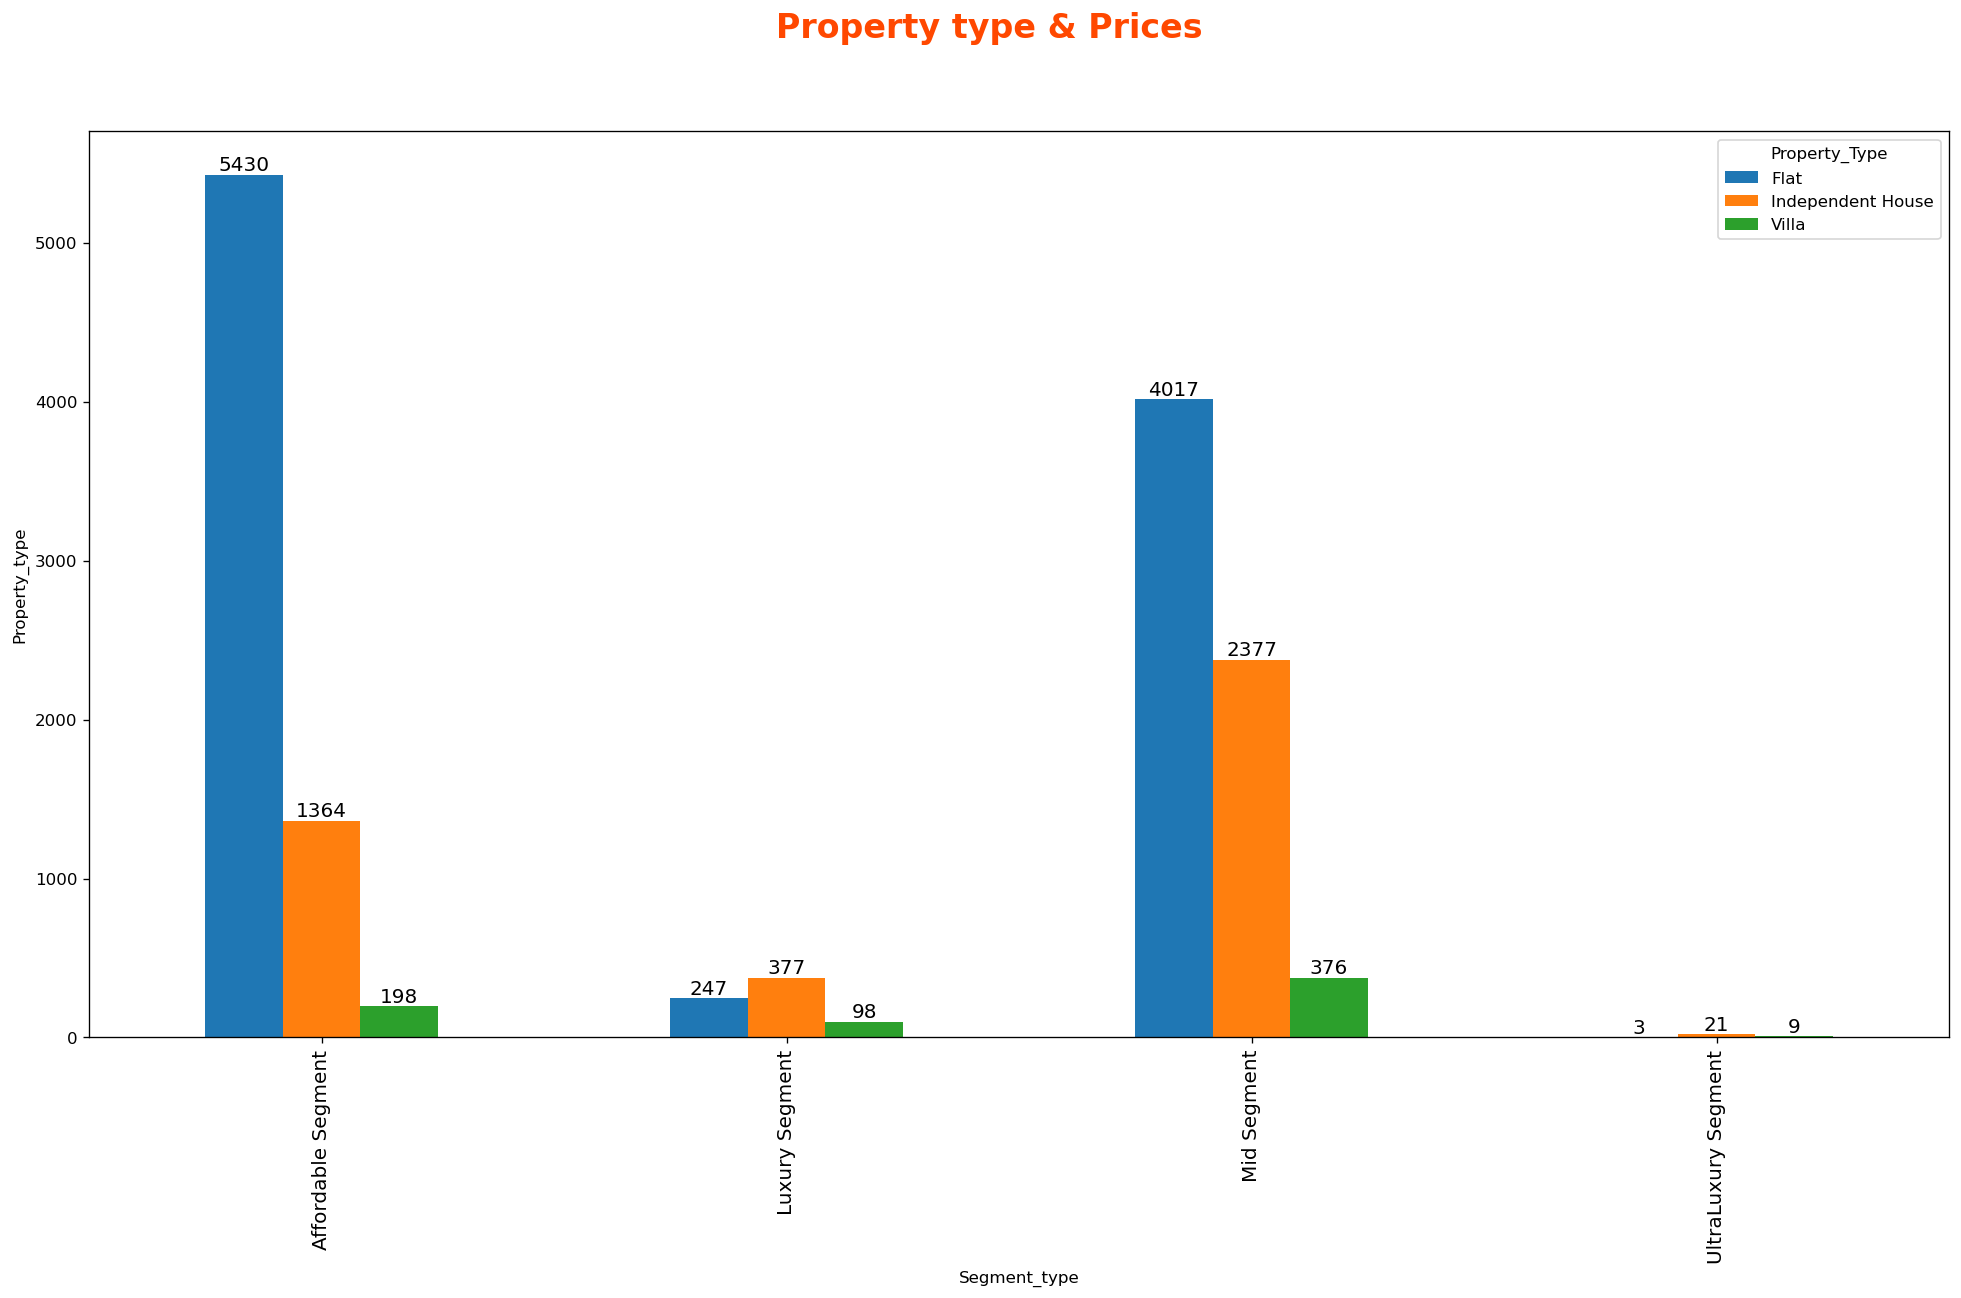

In [37]:
# Get the figure and the axes (or subplots)
fig, ax = plt.subplots(figsize=(20, 10), dpi = 120)


# Using dataframe's plot
segment_stack.plot(kind='bar', ax=ax, fontsize=10, grid=False)

ax.set(xlabel='Segment_type' , ylabel = 'Property_type')

ax.bar_label(ax.containers[0], fontsize = 12)
ax.bar_label(ax.containers[1], fontsize = 12)
ax.bar_label(ax.containers[2], fontsize = 12)

fig.suptitle('Property type & Prices', fontsize= 20, fontweight='bold', color = '#ff4800')

#changing font size of ticks on the x-axis
for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(12)

#### F. Correlation Matrix

In [38]:
#Correlation check
df.corr()

,Baths,Total_Area,Price_per_SQFT,Price
Baths,1.000000,0.530154,0.005665,0.256342
Total_Area,0.530154,1.000000,0.155613,0.425435
Price_per_SQFT,0.005665,0.155613,1.000000,0.047235
Price,0.256342,0.425435,0.047235,1.000000


In [39]:
df.columns

Index(['Name', 'Property_Type', 'Bedrooms', 'Baths', 'Balcony', 'City',
       'Location', 'Total_Area', 'Price_per_SQFT', 'Price', 'Property Title',
       'Area_type', 'Segment_type'],
      dtype='object')

In [40]:
sub=df[['Baths', 'Balcony', 'City',
       'Location', 'Total_Area', 'Price_per_SQFT', 'Price']]

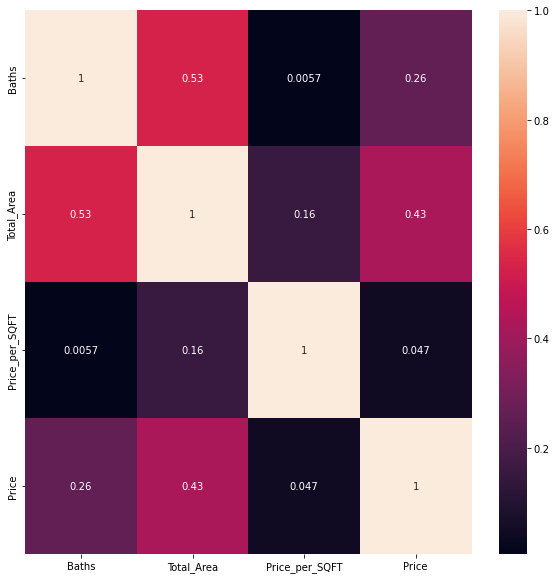

In [41]:
# Creating a subplot with matplotlib

f,ax = plt.subplots(figsize = (10,10))

#Create the correlation map heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

No correlation can be seen amongst the available variables

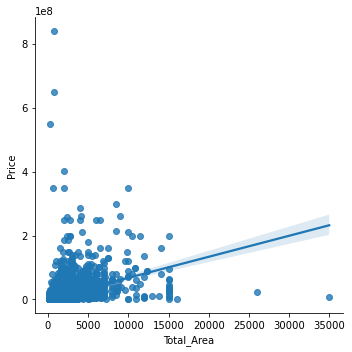

In [42]:
# Create a scatterplot for the "Total_Area" and "price per sqft" columns in seaborn

sns.lmplot(x= 'Total_Area', y = 'Price', data = df)

In [43]:
# Creating Pair Plot

#Keep only variables you want to use in the pair plot

sub_2 = df[['Baths', 'Balcony', 'City',
       'Location', 'Total_Area', 'Price_per_SQFT', 'Price']]

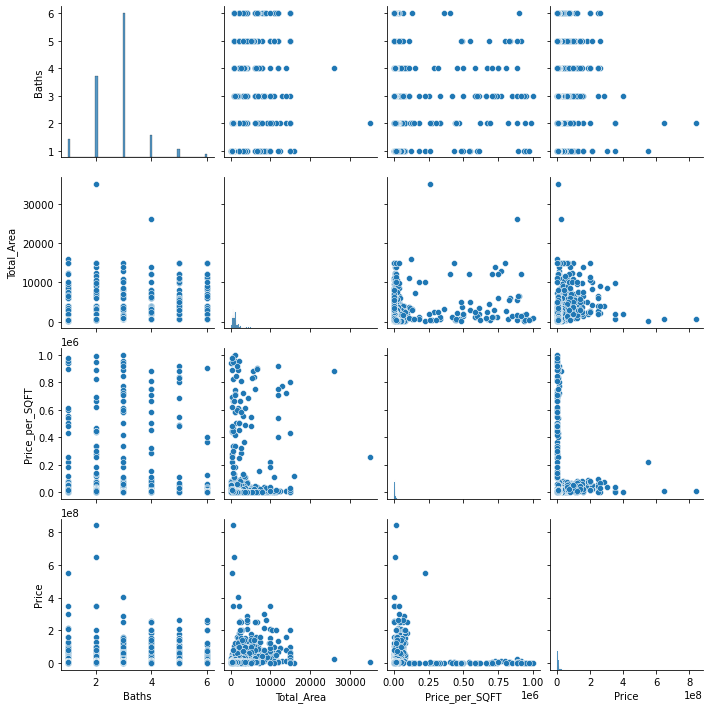

In [44]:
#create a pair plot

g = sns.pairplot(sub_2)

We couldn't find any relationship among the variables

#### G. Checking Number of Bathrooms per flats

In [45]:
df['Baths'].value_counts()

3    7519
2    4242
4    1165
1     969
5     456
6     166
Name: Baths, dtype: int64

3 Bathrooms leads the way!!

In [46]:
#Exporting Data to csv
df.to_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Housing Real Estate Data from Indian Cities\02 Data', 'Final - Indian Real Estate Data.csv'))

## THE END